In [1]:
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from struct import pack, unpack

sys.path.insert(0, "../")
from paths import FIG_DIR, DATA_DIR

In [2]:
def compute_lcs_volume(p, ssb):
    normal = ssb @ p
    vertices_lcs = list(np.where(normal < 0)[0])
    normal_short = normal[vertices_lcs]
    with np.errstate(divide='ignore'):
        factors = normal_short[:, None]/(normal_short[:, None] - normal[None, :])
        factors = np.nan_to_num(factors, copy=False, nan=1.0, posinf=1.0, neginf=1.0)
    summands = np.prod(factors, axis=1)
    np.sum(summands)

In [3]:
def compute_lcs_volume_vectorized(p_matr, ssb):
    normal = - p_matr @ ssb
    normal_short = np.where(normal < 0, normal, 0)
    with np.errstate(divide='ignore'):
        factors = normal_short[:, :, None] / (normal_short[:, :, None] - normal[:, None, :])
        factors = np.nan_to_num(factors, copy=False, nan=1.0, posinf=1.0, neginf=1.0)
    summands = np.prod(factors, axis=2)
    return np.sum(summands, axis=1)

In [4]:
def initialize_transitive_tournament(m):
    return np.triu(np.ones((m, m))) - np.tril(np.ones((m, m))) # transitive preferences

# Generating samples and storing them

In [6]:
num_samples = 1000000

for m in range(4, 16):
    rng = np.random.default_rng(2025 - m)

    ssb = initialize_transitive_tournament(m)
    alpha = np.ones(m)

    p_matr = rng.dirichlet(alpha, num_samples)
    samples = compute_lcs_volume_vectorized(p_matr, ssb)

    with open(DATA_DIR / '13_tr_{:03d}.dat'.format(m), 'wb') as file:
        file.write(pack('d' * len(samples) , *samples))

m = 20
rng = np.random.default_rng(2025 - m)

ssb = initialize_transitive_tournament(m)
alpha = np.ones(m)

p_matr = rng.dirichlet(alpha, num_samples)
samples = compute_lcs_volume_vectorized(p_matr, ssb)

with open(DATA_DIR / '13_tr_{:03d}.dat'.format(m), 'wb') as file:
    file.write(pack('d' * len(samples) , *samples))

In [7]:
num_samples = 500000
m = 30
rng = np.random.default_rng(2025 - m)

ssb = initialize_transitive_tournament(m)
alpha = np.ones(m)

p_matr = rng.dirichlet(alpha, num_samples)
samples = compute_lcs_volume_vectorized(p_matr, ssb)

with open(DATA_DIR / '13_tr_{:03d}.dat'.format(m), 'wb') as file:
    file.write(pack('d' * len(samples) , *samples))

p_matr = rng.dirichlet(alpha, num_samples)
samples = compute_lcs_volume_vectorized(p_matr, ssb)

with open(DATA_DIR / '13_tr_{:03d}.dat'.format(m), 'ab') as file:
    file.write(pack('d' * len(samples) , *samples))

In [8]:
num_samples = 100000
m = 50
rng = np.random.default_rng(2025 - m)

ssb = initialize_transitive_tournament(m)
alpha = np.ones(m)

p_matr = rng.dirichlet(alpha, num_samples)
samples = compute_lcs_volume_vectorized(p_matr, ssb)

with open(DATA_DIR / '13_tr_{:03d}.dat'.format(m), 'wb') as file:
    file.write(pack('d' * len(samples) , *samples))

for _ in range(9):
    p_matr = rng.dirichlet(alpha, num_samples)
    samples = compute_lcs_volume_vectorized(p_matr, ssb)

    with open(DATA_DIR / '13_tr_{:03d}.dat'.format(m), 'ab') as file:
        file.write(pack('d' * len(samples) , *samples))

In [ ]:
with open(DATA_DIR / 'store.dat', 'wb') as file:
    file.write(pack('d' * len(samples) , *samples))


# Reading the file:
# with open(DATA_DIR / 'store.dat', 'rb') as file:
#     packed = file.read()
#     tuple = unpack('d' * (len(packed) // 8), packed) # 8 bytes per double

# Plotting

In [13]:
with open(DATA_DIR / '13_tr_004.dat', 'rb') as file:
    packed = file.read()
    samples = unpack('d' * (len(packed) // 8), packed) # 8 bytes per double

df_samples = pd.DataFrame(samples, columns=['04'])

for i in (list(range(5, 16)) + [20, 30, 50]):
    with open(DATA_DIR / f'13_tr_{i:03d}.dat', 'rb') as file:
        packed = file.read()
        samples = unpack('d' * (len(packed) // 8), packed)
        df_samples[f'{i:02d}'] = samples

df_samples

,04,05,06,07,08,09,10,11,12,13,14,15,20,30,50
0,0.793313,0.330885,0.232670,0.561059,0.677821,0.371672,0.344756,0.930233,0.342470,0.350572,0.570551,0.698831,0.362833,0.384436,0.213956
1,0.960721,0.253642,0.332088,0.781228,0.312699,0.450798,0.646011,0.581686,0.770987,0.045851,0.631347,0.163926,0.523596,0.816872,0.321401
2,0.328804,0.199662,0.509081,0.448362,0.569824,0.727035,0.642503,0.181636,0.619023,0.299985,0.681703,0.008444,0.740673,0.841370,0.046809
3,0.346269,0.430133,0.607856,0.961271,0.836846,0.116421,0.177633,0.726588,0.915139,0.245278,0.626838,0.499994,0.553157,0.302143,0.722153
4,0.533835,0.443642,0.753984,0.103967,0.782084,0.030039,0.617147,0.742761,0.304480,0.464519,0.734389,0.988748,0.475890,0.291645,0.919900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.188189,0.932549,0.396119,0.048333,0.151044,0.146478,0.551971,0.103199,0.780867,0.882517,0.418966,0.106629,0.496877,0.713201,0.022653
999996,0.631871,0.320872,0.522012,0.064302,0.639778,0.579392,0.810542,0.576460,0.290183,0.578994,0.534209,0.829850,0.511047,0.848880,0.032470
999997,0.651383,0.393892,0.041866,0.657361,0.034784,0.103183,0.247784,0.370198,0.873383,0.000478,0.721484,0.298316,0.540103,0.764551,0.118569
999998,0.946448,0.077881,0.246504,0.259323,0.385634,0.823504,0.234647,0.907499,0.452959,0.212118,0.512911,0.893040,0.832904,0.843768,0.509433


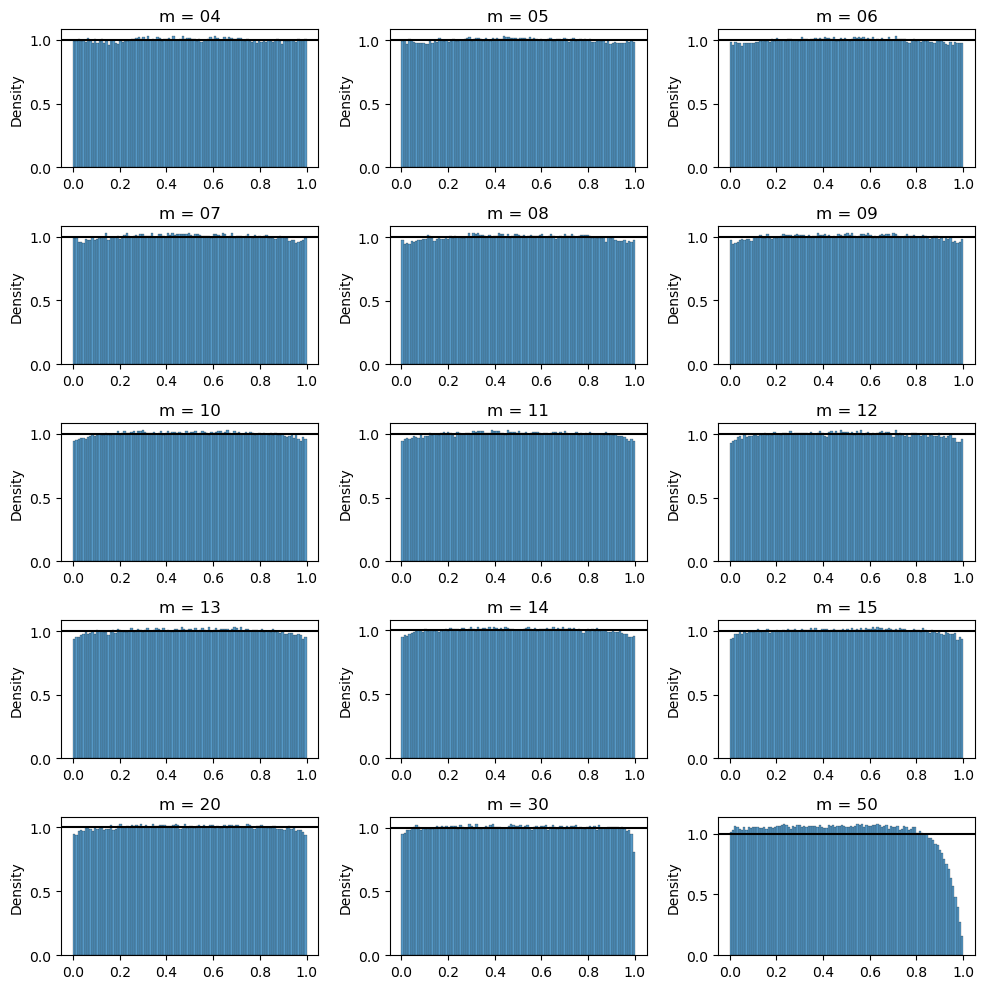

In [17]:
fig, ax = plt.subplots(5, 3, figsize=(10, 10))
columns = [['04', '05', '06'], ['07', '08', '09'], ['10', '11', '12'], ['13', '14', '15'], ['20', '30', '50']]
# columns = [['04', '05', None], [None, None, None], [None, None, None], [None,  None, None], [None,  None, None]]

for i in range(5):
    for j in range(3):
        col = columns[i][j]
        if col is not None:
            g = sns.histplot(df_samples[col], ax=ax[i,j], stat='density', binrange=(0, 1))
            g.axes.set_title("m = " + col)
            g.axhline(y=1, color='black')
            g.set_xlabel(None)

fig.tight_layout()

fig.savefig(FIG_DIR / "distr_trans_lcs.svg")
fig.savefig(FIG_DIR / "distr_trans_lcs.png", dpi=300)
fig.savefig(FIG_DIR / "distr_trans_lcs.pdf")

In [18]:
df_samples.describe().T

,count,mean,std,min,25%,50%,75%,max
04,1000000.0,5.001793e-01,2.878229e-01,6.719388e-08,0.252600,0.499880,0.748051,1.000000e+00
05,1000000.0,4.998683e-01,2.873464e-01,5.751280e-07,0.252495,0.499619,0.747673,9.999986e-01
06,1000000.0,5.000563e-01,2.869898e-01,2.555896e-09,0.252693,0.500100,0.747095,9.999997e-01
07,1000000.0,4.998458e-01,2.867630e-01,1.447603e-06,0.252845,0.499492,0.747054,9.999989e-01
08,1000000.0,5.004153e-01,2.865622e-01,5.067618e-07,0.253918,0.500296,0.747442,9.999985e-01
09,1000000.0,5.003396e-01,2.867991e-01,1.093650e-06,0.253126,0.500666,0.747660,9.999991e-01
10,1000000.0,5.000440e-01,2.867173e-01,6.152413e-07,0.252762,0.500014,0.747296,9.999997e-01
11,1000000.0,5.000990e-01,2.866609e-01,1.007619e-06,0.253174,0.499686,0.747501,1.000002e+00
12,1000000.0,4.997857e-01,2.866680e-01,9.417351e-07,0.252544,0.499438,0.746826,9.999991e-01
13,1000000.0,5.003288e-01,2.867266e-01,4.837379e-08,0.252941,0.500588,0.747491,9.999997e-01


In [21]:
print("Invalid samples for m = 20: ", df_samples['20'][(df_samples['20'] < 0) | (df_samples['20'] > 1)].count())
print("Invalid samples for m = 30: ", df_samples['30'][(df_samples['30'] < 0) | (df_samples['30'] > 1)].count())
print("Invalid samples for m = 50: ", df_samples['50'][(df_samples['50'] < 0) | (df_samples['50'] > 1)].count())

Invalid samples for m = 20:  37
Invalid samples for m = 30:  1206
Invalid samples for m = 50:  45711


In [34]:
quantiles = df_samples.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]).T[:-1]
quantiles -= [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
quantiles

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
04,0.000685,0.002227,0.001875,0.001029,-0.000120,-0.000467,-0.001591,-0.001440,-0.000495
05,0.001444,0.002362,0.002090,0.001229,-0.000381,-0.001729,-0.002129,-0.002456,-0.001631
06,0.002357,0.002873,0.002486,0.001367,0.000100,-0.001277,-0.002268,-0.002782,-0.002219
07,0.002729,0.003071,0.002287,0.001430,-0.000508,-0.001500,-0.002743,-0.002988,-0.002738
08,0.003222,0.003944,0.003636,0.002015,0.000296,-0.000877,-0.001711,-0.003113,-0.002777
09,0.002951,0.003502,0.002517,0.001541,0.000666,-0.000889,-0.001766,-0.002659,-0.002459
10,0.003243,0.003356,0.001828,0.001003,0.000014,-0.001030,-0.002419,-0.002873,-0.002627
11,0.003055,0.003155,0.002877,0.001182,-0.000314,-0.001436,-0.002201,-0.002529,-0.002741
12,0.002877,0.002822,0.001855,0.000854,-0.000562,-0.001786,-0.002874,-0.003192,-0.002749
13,0.002765,0.003006,0.002776,0.001790,0.000588,-0.000358,-0.001828,-0.002831,-0.002851


<Axes: >

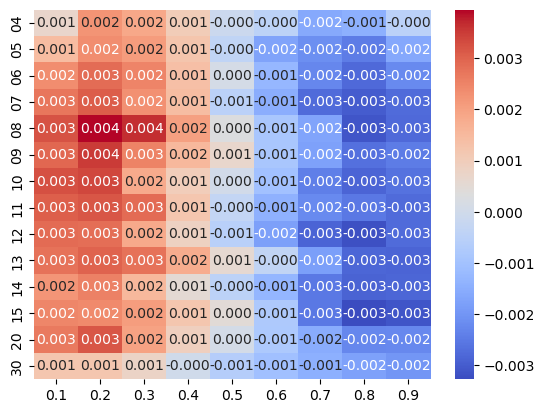

In [35]:
sns.heatmap(quantiles, annot=True, fmt=".3f", cmap='coolwarm')

--> The distribution is a little bit more centered than a uniform distribution.

# Good lotteries

In [43]:
m = 8
rng = np.random.default_rng(2025 - m)

ssb = initialize_transitive_tournament(m)
alpha = np.ones(m)

p_matr = rng.dirichlet(alpha, 1000)
samples = compute_lcs_volume_vectorized(p_matr, ssb)
np.sum(samples > 0.99), samples[samples > 0.99], p_matr[samples > 0.99]

(12,
 array([0.99368382, 0.99952543, 0.99301411, 0.99632757, 0.99895031,
        0.99750612, 0.99843651, 0.99980392, 0.99015606, 0.99523426,
        0.9916351 , 0.99605031]),
 array([[0.52383244, 0.05391684, 0.01985334, 0.15857467, 0.12817014,
         0.03871761, 0.04062444, 0.03631052],
        [0.67111783, 0.00789884, 0.03304814, 0.15975565, 0.00996676,
         0.02625273, 0.08381951, 0.00814053],
        [0.5137135 , 0.10011032, 0.03571813, 0.0139572 , 0.14398412,
         0.16023209, 0.00182324, 0.03046141],
        [0.59204996, 0.02552768, 0.0192672 , 0.00586318, 0.22179343,
         0.01304313, 0.09243296, 0.03002246],
        [0.62267538, 0.02668902, 0.04599396, 0.08502617, 0.17871734,
         0.00258989, 0.01781512, 0.02049312],
        [0.47776051, 0.26496477, 0.04471879, 0.11203102, 0.04337848,
         0.0376825 , 0.01648366, 0.00298027],
        [0.55702219, 0.14583491, 0.02975703, 0.09275977, 0.14496234,
         0.00433333, 0.01450864, 0.01082179],
        [0.71838635,

<Axes: >

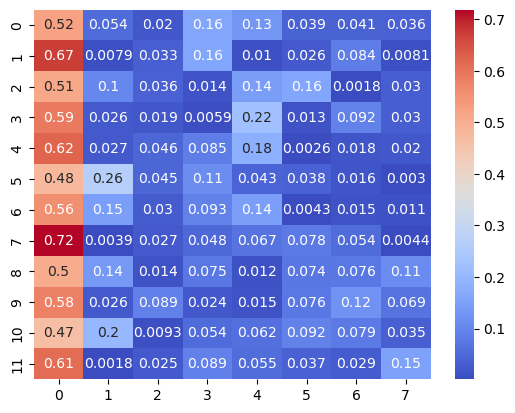

In [44]:
sns.heatmap(p_matr[samples > 0.99], annot=True, cmap='coolwarm')

In [45]:
m = 20
rng = np.random.default_rng(2025 - m)

ssb = initialize_transitive_tournament(m)
alpha = np.ones(m)

p_matr = rng.dirichlet(alpha, 1000)
samples = compute_lcs_volume_vectorized(p_matr, ssb)
np.sum(samples > 0.99), samples[samples > 0.99], p_matr[samples > 0.99]

(5,
 array([0.99702309, 0.99180519, 0.99876392, 0.99527319, 0.99192877]),
 array([[2.16042150e-01, 5.23583902e-02, 4.87782440e-02, 7.10573663e-02,
         6.77138020e-02, 6.54972850e-02, 1.44078757e-01, 7.66424343e-03,
         4.61221883e-02, 5.83268443e-03, 2.16418042e-02, 2.69907176e-02,
         9.81212276e-02, 8.40816728e-03, 2.72053622e-02, 5.21046449e-03,
         4.02560193e-02, 7.82696599e-03, 2.68094460e-02, 1.23847146e-02],
        [1.68804891e-01, 7.78127200e-02, 7.56754649e-02, 7.66459725e-02,
         1.36739724e-01, 6.80314290e-02, 2.98073226e-03, 2.63665219e-02,
         4.67848107e-02, 1.77839306e-02, 4.70398795e-02, 1.42069537e-03,
         9.64690644e-03, 4.07231700e-02, 8.09787758e-03, 9.90460994e-03,
         4.68771459e-02, 6.00143242e-02, 2.16520101e-02, 5.69971842e-02],
        [2.99480601e-01, 3.09761024e-02, 2.00452876e-01, 1.86317727e-03,
         4.42101490e-02, 2.10002418e-02, 7.28212837e-03, 9.92510436e-03,
         2.79534245e-03, 6.80291513e-03, 7.91523

<Axes: >

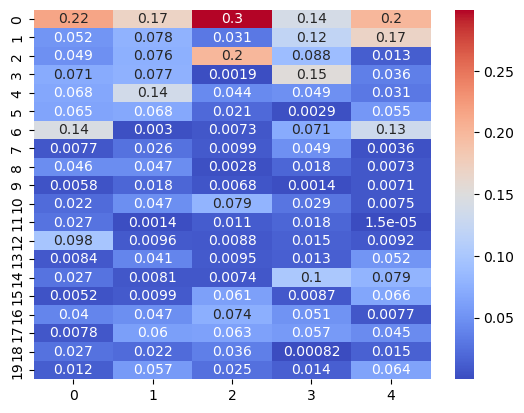

In [ ]:
#Note: Lotteries are depicted from top to bottom
sns.heatmap(p_matr[samples > 0.99].T, annot=True, cmap='coolwarm')

# Transitive + 3-cycle

In [48]:
m = 6
rng = np.random.default_rng(2025)

ssb = np.array([
    [0, 1, 1, 1, 1, 1],
    [-1, 0, 1, 1, 1, 1],
    [-1, -1, 0, 1, 1, 1],
    [-1, -1, -1, 0, 1, -1],
    [-1, -1, -1, -1, 0, 1],
    [-1, -1, -1, 1, -1, 0],
])
alpha = np.ones(m)

p_matr = rng.dirichlet(alpha, num_samples)
samples = compute_lcs_volume_vectorized(p_matr, ssb)

<Axes: ylabel='Density'>

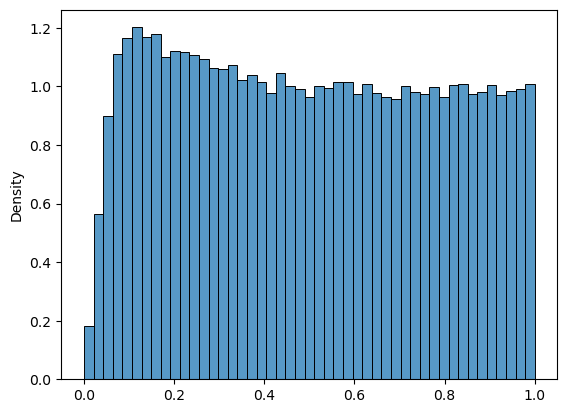

In [49]:
sns.histplot(samples, stat='density', binrange=(0, 1))